In [6]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Fallstudie "Maximale Teilsumme"

## Motivation
**Problem in 1D:** Gegeben ist eine Liste ganzer Zahlen. Finde die Sequenz von Zahlen, die einen maximalen Wert besitzt. Keine Sequenz bzw eine Sequenz der Länge 0 besitzt die Teilsumme 0.

**1D-Beispiel:** <hier einfügen>

**Problem in 2D:** Gegeben ist eine Matrix mit n Zeilen und m Spalten. Finde eine rechteckige Untertabelle, deren summierte Elemente maximal ist.

**2D-Beispiel**

**Praktische Relevanz:** Das Problem ist in der Bildbearbeitung, 

#### Bemerkung
Dieses Notebook ist mit #Hide-Me - Cells erstellt, d.h. der dargestellte Python-Code ist nicht die ausführbare Datei. Diese ist versteckt im Notebook. Siehe auch


## Algorithmus 1

Berechne alle Teilfolgen und merke größte Summe.

**Pythoncode**     
```python
def max_teil_summe1(folge):
    maxSumme = 0
    size = len(folge)

    for i in range(0, size):
        for j in range(i, size):
            #summe bilden
            summe = 0 
            for k in range(i, j):
                summe = summe + folge[k]
                #summe überprüfen, ob größer
            maxSumme = max(summe, maxSumme)
    return maxSumme
```


In [2]:
hide_me

import ipywidgets as widgets
from IPython.display import clear_output

start_button = widgets.Button(
    description='Run Code',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

'''
def max_teil_summe1(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        for j in range(i, size):
            summe = 0
            for k in range(i, j):
                summe = summe + folge[k]
            maxSumme = max(summe, maxSumme)
    return maxSumme
   
folge1 = [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]
''' 
def start_button_eventhandler(obj):
    clear_output()
    display(start_button)
    
    
    
start_button.on_click(start_button_eventhandler)

display(start_button)
                          

Button(description='Show', style=ButtonStyle(), tooltip='Click me')

In [3]:
def max_teil_summe1(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        for j in range(i, size):
            summe = 0
            for k in range(i, j):
                summe = summe + folge[k]
            maxSumme = max(summe, maxSumme)
    return maxSumme
    
folge1 = [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]
print("Die maximale Teilsumme der Folge ", folge1, " ist ", max_teil_summe1(folge1), ".")


Die maximale Teilsumme der Folge  [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]  ist  8 .


---
## Algorithmus 2

Eigentlich ist es unnötig, immer wieder die Summe auf 0 zu setzen, dann wieder neu zu berechnen und dann ein weiteres Folgeelement aufzuaddieren.
Zwei Schleifen reichen aus!

**Pythoncode:**
```python
def max_teil_summe2(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        #summe bilden
        summe = 0
        for j in range(i, size):
            summe +=folge[j]
            #Summe überprüfen, ob größer
        maxSumme = max(summe, maxSumme)
    return maxSumme
```

In [4]:
hide_me

import ipywidgets as widgets
from IPython.display import clear_output

start_button = widgets.Button(
    description='Run Code',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

def max_teil_summe2(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        summe = 0
        for j in range(i, size):
            summe +=folge[j]
            maxSumme = max(summe, maxSumme)
    return maxSumme

folge1 = [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]

def start_button_eventhandler(obj):
    clear_output()
    display(start_button)
    
    print("Die maximale Teilsumme der Folge ", folge1, " ist ", max_teil_summe2(folge1), ".")

    
start_button.on_click(start_button_eventhandler)

display(start_button)

Button(description='Run Code', style=ButtonStyle(), tooltip='Click me')

Die maximale Teilsumme der Folge  [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]  ist  8 .


---
## Algorithmus 3

Es muss noch schneller gehen, denn jedes Element der Folge wird mehrmals angefasst. Idee: Eine Teilsumme von 0 ist immer untere Schranke, da jede leere Folge die Teilsumme 0 hat. Summiere Elemente von links auf und speichere die bisher größte Teilsumme. Falls neue Teilsumme < 0, setze aktuelle Summe auf 0, da die Teilfolge nicht die größte sein kann. Man könnte ja erst beim nächsten Folgenglied beginnen.

Außerdem werden nun auch die Grenzen des Teilintervalls bestimmt, ohne dass sich die Laufzeit signifikant ändert

**Pythoncode:**
```python
def max_teil_summe3(folge):
    global liMax, reMax
    liMax = reMAx = liTmp = 0

    bisherMax = 0
    randMax = 0
    size = len(folge)
    
    for i in range(0, size):
        randMax = max(0, randMax + folge[i])
        
        if randMax == 0:
            liTmp = i+1
        if randMax > bisherMax:
            bisherMax = randMax
            liMax = liTmp
            reMax = i
    return bisherMax
```

In [46]:
hide_me

import ipywidgets as widgets
from IPython.display import clear_output

start_button = widgets.Button(
    description='Run Code',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

def max_teil_summe3(folge):
    global liMax, reMax
    liMax = reMAx = liTmp = 0

    bisherMax = 0
    randMax = 0
    size = len(folge)
    
    for i in range(0, size):
        randMax = max(0, randMax + folge[i])
        
        if randMax == 0:
            liTmp = i+1
        if randMax > bisherMax:
            bisherMax = randMax
            liMax = liTmp
            reMax = i
    return bisherMax

folge1 = [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]

def start_button_eventhandler(obj):
    clear_output()
    display(start_button)
    
    print("Die maximale Teilsumme der Folge ", folge1, " ist ", max_teil_summe3(folge1), ".")
    print(f'Mit dem linken Rand "{folge1[liMax]}" mit Index {liMax} und dem rechten Rand "{folge1[reMax]}" mit Index {reMax}.')
    
start_button.on_click(start_button_eventhandler)

display(start_button)

Button(description='Run Code', style=ButtonStyle(), tooltip='Click me')

Die maximale Teilsumme der Folge  [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]  ist  8 .
Mit dem linken Rand "3" mit Index 2 und dem rechten Rand "7" mit Index 5.


---
## Algorithmus 4

Idee: divide and conquer

**Pythoncode:**
```python
def max_teilsumme_rekursiv_gesamt(folge):
    return max_teilsumme_rekursiv(folge, 0, len(folge)-1)

def max_teilsumme_rekursiv(folge, links, rechts):
    laenge = len(folge)
    links = int(links)
    rechts = int(rechts)
    if 0 <= links <= rechts < laenge:
        if links == rechts:
            return max(0, folge[links])
        else:
            mitte = (rechts+links)/2
            maxLinks = max_teilsumme_rekursiv(folge, links, mitte)
            maxRechts = max_teilsumme_rekursiv(folge, mitte+1, rechts)
            rechtesMax = rechtes_rand_max(folge, links, mitte)
            linkesMax = linkes_rand_max(folge, mitte+1, rechts)
            return max(maxRechts, max(maxLinks, rechtesMax+linkesMax))
    return 0

def rechtes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if  0 <= links <= rechts < laenge:
        
        #print("Recht_rand_max: ",links, " ", rechts)
        for i in range(int(rechts), int(links)-1, -1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax

def linkes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if 0 <= links <= rechts < laenge:
        #print("Links_rand_max: ",links, " ", rechts)
        for i in range(int(links), int(rechts)+1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax
```

In [37]:
hide_me

import ipywidgets as widgets
from IPython.display import clear_output

start_button = widgets.Button(
    description='Run Code',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

def rechtes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if  0 <= links <= rechts < laenge:
        
        #print("Recht_rand_max: ",links, " ", rechts)
        for i in range(int(rechts), int(links)-1, -1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax

def linkes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if 0 <= links <= rechts < laenge:
        #print("Links_rand_max: ",links, " ", rechts)
        for i in range(int(links), int(rechts)+1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax

def max_teilsumme_rekursiv(folge, links, rechts):
    laenge = len(folge)
    links = int(links)
    rechts = int(rechts)
    if 0 <= links <= rechts < laenge:
        if links == rechts:
            return max(0, folge[links])
        else:
            mitte = (rechts+links)/2
            maxLinks = max_teilsumme_rekursiv(folge, links, mitte)
            maxRechts = max_teilsumme_rekursiv(folge, mitte+1, rechts)
            rechtesMax = rechtes_rand_max(folge, links, mitte)
            linkesMax = linkes_rand_max(folge, mitte+1, rechts)
            return max(maxRechts, max(maxLinks, rechtesMax+linkesMax))
    return 0

def max_teilsumme_rekursiv_gesamt(folge):
    return max_teilsumme_rekursiv(folge, 0, len(folge)-1)


folge1 = [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]

def start_button_eventhandler(obj):
    clear_output()
    display(start_button)
    
    print("Die maximale Teilsumme der Folge ", folge1, " ist ", max_teilsumme_rekursiv_gesamt(folge1), ".")

    
start_button.on_click(start_button_eventhandler)

display(start_button)

Button(description='Run Code', style=ButtonStyle(), tooltip='Click me')

Die maximale Teilsumme der Folge  [5, -8, 3, 3, -5, 7, -2, -7, 3, 5]  ist  8 .


---
## Algorithmus 5: 2D-Version des Problems

Quellen:
    https://www.geeksforgeeks.org/maximum-sum-rectangle-in-a-2d-matrix-dp-27/
        
    https://www.tutorialspoint.com/Maximum-sum-rectangle-in-a-2D-matrix
    https://www.youtube.com/watch?v=-FgseNO-6Gk
    https://stackoverflow.com/questions/54645686/maximum-sum-from-a-2d-array-dp
        
    https://en.wikipedia.org/wiki/Maximum_subarray_problem
    https://stackoverflow.com/questions/19064133/understanding-kadanes-algorithm-for-2-d-array
    https://github.com/mission-peace/interview/blob/master/python/dynamic/sub_rectangular_maximum_sum.py

Die naive Lösung für dieses Problem besteht darin, jedes mögliche Rechteck in einem gegebenen 2D-Array zu prüfen. Diese Lösung erfordert 4 verschachtelte Schleifen und die Zeitkomplexität dieser Lösung wäre O(n^4).

Kadanes Algorithmus für 1D-Array kann verwendet werden, um die Zeitkomplexität auf O(n^3) zu reduzieren. Die Idee besteht darin, die linke und rechte Spalte nacheinander zu fixieren und die maximale Summe zusammenhängender Zeilen für jedes linke und rechte Spaltenpaar zu finden. Im Grunde finden wir für jedes fixierte linke und rechte Spaltenpaar die Zahlen der oberen und unteren Zeile (die die maximale Summe haben). Um die Nummern der oberen und unteren Zeile zu finden, berechnen Sie die Sonne der Elemente in jeder Zeile von links nach rechts und speichern diese Summen in einem Array, z.B. temp[]. Wenn wir den 1D-Algorithmus von Kadane auf temp[] anwenden und das Unterarray temp mit der maximalen Summe erhalten, wäre diese maximale Summe die maximal mögliche Summe mit links und rechts als Randspalten. Um die maximale Gesamtsumme zu erhalten, vergleichen wir diese Summe mit der bisherigen Maximalsumme.

(Referenz: übersetzt mit Deepl von: https://www.geeksforgeeks.org/maximum-sum-rectangle-in-a-2d-matrix-dp-27/)

In [63]:
# Python3 program to find maximum sum  
# subarray in a given 2D array  
  
# Implementation of Kadane's algorithm  
# for 1D array. The function returns the 
# maximum sum and stores starting and  
# ending indexes of the maximum sum subarray  
# at addresses pointed by start and finish  
# pointers respectively.  
#
#  Reference: 
#https://www.geeksforgeeks.org/maximum-sum-rectangle-in-a-2d-matrix-dp-27/
# This code is contributed by PranchalK 
#


def kadane(arr, start, finish, n): 
      
    # initialize sum, maxSum and  
    Sum = 0
    maxSum = -999999999999
    i = None
  
    # Just some initial value to check 
    # for all negative values case  
    finish[0] = -1
  
    # local variable  
    local_start = 0
      
    for i in range(n): 
        Sum += arr[i]  
        if Sum < 0: 
            Sum = 0
            local_start = i + 1
        elif Sum > maxSum: 
            maxSum = Sum
            start[0] = local_start  
            finish[0] = i 
  
    # There is at-least one 
    # non-negative number  
    if finish[0] != -1:  
        return maxSum  
  
    # Special Case: When all numbers  
    # in arr[] are negative  
    maxSum = arr[0]  
    start[0] = finish[0] = 0
  
    # Find the maximum element in array 
    for i in range(1, n): 
        if arr[i] > maxSum: 
            maxSum = arr[i]  
            start[0] = finish[0] = i 
    return maxSum 
  
# The main function that finds maximum 
# sum rectangle in M[][]  
def findMaxSum(M): 
    global ROW, COL 
      
    # Variables to store the final output  
    maxSum, finalLeft = -999999999999, None
    finalRight, finalTop, finalBottom = None, None, None
    left, right, i = None, None, None
      
    temp = [None] * ROW 
    Sum = 0
    start = [0] 
    finish = [0]  
  
    # Set the left column  
    for left in range(COL): 
          
        # Initialize all elements of temp as 0  
        temp = [0] * ROW  
  
        # Set the right column for the left  
        # column set by outer loop  
        for right in range(left, COL): 
              
            # Calculate sum between current left  
            # and right for every row 'i' 
            for i in range(ROW): 
                temp[i] += M[i][right]  
  
            # Find the maximum sum subarray in  
            # temp[]. The kadane() function also  
            # sets values of start and finish.  
            # So 'sum' is sum of rectangle between   
            # (start, left) and (finish, right) which  
            # is the maximum sum with boundary columns  
            # strictly as left and right.  
            Sum = kadane(temp, start, finish, ROW)  
  
            # Compare sum with maximum sum so far.  
            # If sum is more, then update maxSum  
            # and other output values  
            if Sum > maxSum: 
                maxSum = Sum
                finalLeft = left  
                finalRight = right  
                finalTop = start[0]  
                finalBottom = finish[0] 
  
    # Prfinal values  
    print("(Top, Left)", "(", finalTop,  
                              finalLeft, ")")  
    print("(Bottom, Right)", "(", finalBottom,  
                                  finalRight, ")")  
    print("Max sum is:", maxSum) 
    
    
    
# Driver Code 
ROW = 4
COL = 5
M = [[-11, -2, -1, -4, -20], 
     [-8, -3, 4, 2, 15],  
     [3, 2, 10, 1, 3],  
     [-4, -1, 1, 7, -6]]  
  
findMaxSum(M) 
  


(Top, Left) ( 1 2 )
(Bottom, Right) ( 3 4 )
Max sum is: 37


In [69]:
#Alternative
"""
Problem Statement
=================
Write a program to find maximum sum rectangle in give 2D matrix. Assume there is at least one positive number in the 2D
matrix.
Solution:
--------
* Keep temp array with size as number of rows. Start left and right from 0 and keep adding values for each row and
  maintain them in this temp array.
* Run Kadane's algorithm to find max sum subarray in temp. Now increment right by 1.
* When right reaches last column reset right to 1 and left to 1.
Analysis
--------
* Space complexity of this algorithm is O(row)
* Time complexity of this algorithm is O(row*col*col)
Video
-----
* https://youtu.be/yCQN096CwWM
References
----------
* http://www.geeksforgeeks.org/dynamic-programming-set-27-max-sum-rectangle-in-a-2d-matrix/
"""

from collections import namedtuple

Result = namedtuple("Result","maxSum leftBound rightBound upBound lowBound")

KadanesResult = namedtuple("KadanesResult","maxSum start end")


def kadanes(temp):
    max = 0
    maxStart = -1
    maxEnd = -1
    currentStart = 0
    maxSoFar = 0

    for i in range(0, len(temp)):
        maxSoFar += temp[i]

        if maxSoFar < 0:
            maxSoFar = 0
            currentStart = i + 1

        if maxSoFar > max:
            maxStart = currentStart
            maxEnd = i
            max = maxSoFar

    return KadanesResult(max, maxStart, maxEnd)


def max_sub_sub_rectangle(rectangle):

    rows = len(rectangle)
    cols = len(rectangle[0])

    result = Result(float("-inf"), -1, -1, -1, -1)

    for left in range(cols):
        temp = [0 for _ in range(rows)]
        for right in range(left, cols):
            for i in range(rows):
                temp[i] += rectangle[i][right]

            kadanes_result = kadanes(temp)
            if kadanes_result.maxSum > result.maxSum:
                result = Result(kadanes_result.maxSum, left, right, kadanes_result.start, kadanes_result.end)

    return result

if __name__ == '__main__':
    rectangle = [[2,  1, -3, -4,  -5],
                 [10,  6,  3,  -14,  1],
                 [12, -2, -1,  4, -5],
                 [-3,  3,  1,  0,  3]]

    result = max_sub_sub_rectangle(rectangle)
   # assert 18 == result.maxSum
    print(result)

Result(maxSum=29, leftBound=0, rightBound=1, upBound=0, lowBound=2)


---
## Vergleich der Laufzeiten aller Algorithmen

mit 
* Algorithmus 1 = Rot
* Algorithmus 2 = Grün
* Algorithmus 3 = Blau
* Algorithmus 4 = Gelb


Button(description='Show', style=ButtonStyle(), tooltip='Click me')

Start...
[1, 100, 1000, 10000, 100000, 1000000]
[1.234002411365509e-06, 7.939524948596954e-07, 6.710179150104523e-07, 7.562339305877686e-07, 7.809139788150787e-07, 7.511116564273834e-07]
[1.0719522833824158e-06, 7.431954145431519e-07, 6.188638508319855e-07, 6.440095603466034e-07, 5.75091689825058e-07, 6.938353180885315e-07]
[1.041218638420105e-06, 5.420297384262085e-07, 8.591450750827789e-07, 7.092021405696869e-07, 5.462206900119781e-07, 6.509944796562195e-07]
[2.345070242881775e-06, 2.03913077712059e-06, 1.4649704098701477e-06, 1.3918615877628326e-06, 1.4491379261016846e-06, 1.3848766684532166e-06]


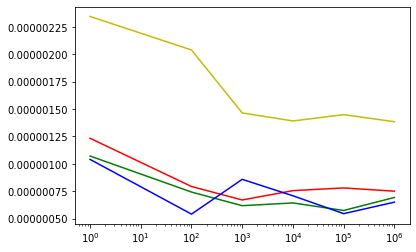

In [5]:
hide_me

import ipywidgets as widgets
from IPython.display import clear_output
import timeit
import matplotlib.pyplot as plt

start_button = widgets.Button(
    description='Show',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

MAXTEILSUM01 = '''
def max_teil_summe1(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        for j in range(i, size):
            summe = 0
            for k in range(i, j):
                summe = summe + folge[k]
                maxSumme = max(summe, maxSumme)
    return maxSumme
'''

MAXTEILSUM02 = '''
def max_teil_summe2(folge):
    maxSumme = 0
    size = len(folge)
    
    for i in range(0, size):
        summe = 0
        for j in range(i, size):
            summe +=folge[j]
            maxSumme = max(summe, maxSumme)
    return maxSumme
'''    

MAXTEILSUM03 = '''
def max_teil_summe3(folge):
    global liMax, reMax
    liMax = reMAx = liTmp = 0

    bisherMax = 0
    randMax = 0
    size = len(folge)
    
    for i in range(0, size):
        randMax = max(0, randMax + folge[i])
        
        if randMax == 0:
            liTmp = i+1
        if randMax > bisherMax:
            bisherMax = randMax
            liMax = liTmp
            reMax = i
    return bisherMax
''' 

MAXTEILSUM04 = '''
def rechtes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if  0 <= links <= rechts < laenge:
        
        #print("Recht_rand_max: ",links, " ", rechts)
        for i in range(int(rechts), int(links)-1, -1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax

def linkes_rand_max(folge, links, rechts):
    laenge = len(folge)
    bisherMax = 0
    bisherSum = 0
    if 0 <= links <= rechts < laenge:
        #print("Links_rand_max: ",links, " ", rechts)
        for i in range(int(links), int(rechts)+1):
            bisherSum += folge[i]
            bisherMax = max(bisherMax, bisherSum)
    return bisherMax

def max_teilsumme_rekursiv(folge, links, rechts):
    laenge = len(folge)
    links = int(links)
    rechts = int(rechts)
    if 0 <= links <= rechts < laenge:
        if links == rechts:
            return max(0, folge[links])
        else:
            mitte = (rechts+links)/2
            maxLinks = max_teilsumme_rekursiv(folge, links, mitte)
            maxRechts = max_teilsumme_rekursiv(folge, mitte+1, rechts)
            rechtesMax = rechtes_rand_max(folge, links, mitte)
            linkesMax = linkes_rand_max(folge, mitte+1, rechts)
            return max(maxRechts, max(maxLinks, rechtesMax+linkesMax))
    return 0

def max_teilsumme_rekursiv_gesamt(folge):
    return max_teilsumme_rekursiv(folge, 0, len(folge)-1)
''' 

def start_button_eventhandler(obj):
    clear_output()
    display(start_button)
    print('Start...')

    x = []
    y = []
    z = []
    w = []
    v = []
    for i in [1,100,1000,10000,100000,1000000]:
        xwert = i
        ywert = timeit.timeit(MAXTEILSUM01, number=1, setup='pzahl={}'.format(i))
        zwert = timeit.timeit(MAXTEILSUM02, number=1, setup='pzahl={}'.format(i))
        wwert = timeit.timeit(MAXTEILSUM03, number=1, setup='pzahl={}'.format(i))
        vwert = timeit.timeit(MAXTEILSUM04, number=1, setup='pzahl={}'.format(i))


        x.append(xwert)
        y.append(ywert)
        z.append(zwert)
        w.append(wwert)
        v.append(vwert)


    print(x)
    print(y)
    print(z)
    print(w)
    print(v)

    plt.plot(x, y, 'r')
    plt.plot(x, z, 'g')
    plt.plot(x, w, 'b')
    plt.plot(x, v, 'y')

    plt.xscale("log")
    plt.show()

    
start_button.on_click(start_button_eventhandler)

display(start_button)

## Literatur
[WU03] Wolfgang Urban, HIB Wien, Manuskript [Maximale Teilsummen](https://bio.informatik.uni-jena.de/wp/wp-content/uploads/2017/12/MaxPartSums), 2003
[G4G] Largest Sum Contiguous Subarray, [Lösungen in verschiedenen Programmiersprachen](https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/)
[WP20] Wikipedia, [Maximum Subarray Problem](https://en.wikipedia.org/wiki/Maximum_subarray_problem) 
[TR15] Tushar Roy, Maximum Sum Rectangular Submatrix in Matrix dynamic programming [2D Kadane Algorithm](https://www.youtube.com/watch?v=yCQN096CwWM) , Youtube Tutorial